#Import all necessary libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# Import these libraries if you want to do try some ML Algos on this dataset.

# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import roc_auc_score,roc_curve, explained_variance_score
# from sklearn.model_selection import cross_val_score
# from statsmodels.tsa.seasonal import seasonal_decompose as season
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# from sklearn.metrics import accuracy_score, balanced_accuracy_score
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV,StratifiedKFold
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import SGDClassifier
# from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
# from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
# from sklearn.metrics import classification_report
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import learning_curve
# from mlxtend.plotting import plot_decision_regions
# from sklearn.decomposition import PCA
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
# from sklearn.neural_network import MLPRegressor
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from statsmodels.tsa.stattools import adfuller, acf, pacf
# from statsmodels.tsa.arima_model import ARIMA
# from pmdarima.utils import decomposed_plot
# from pmdarima.arima import decompose
# from pmdarima import auto_arima
# from sklearn.linear_model import LassoCV
# from sklearn.linear_model import RidgeCV
# from sklearn.mixture import GaussianMixture

# Read and check the shape of dataset:

In [ ]:
import os
curr_path = os.getcwd()
curr_path

'/content'

In [ ]:
df = pd.read_csv("/content/crypto-markets.csv")
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [ ]:
df

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11075,dash,DASH,Dash,2017-12-17,12,1014.51,1178.18,1014.51,1105.92,460594000.0,7.869960e+09,0.5585,163.67
11076,dash,DASH,Dash,2017-12-18,12,1110.16,1195.74,1044.76,1167.12,278638000.0,8.614190e+09,0.8104,150.98
11077,dash,DASH,Dash,2017-12-19,12,1165.03,1254.28,1126.85,1186.63,302869000.0,9.042190e+09,0.4691,127.43
11078,dash,DASH,Dash,2017-12-20,12,1184.92,1642.22,1167.30,1550.85,816872000.0,9.198860e+09,0.8076,474.92


**Extract only Bitcoin price:**

In [ ]:
#Extracts only Bitcoin price
df=df[df["symbol"]=="BTC"]

# The resulting DataFrame df will contain only the rows where the symbol is "BTC", effectively extracting the Bitcoin price data.

In [ ]:
#Reads columns
print("Data Columns --> ",list(df.columns))

Data Columns -->  ['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low', 'close', 'volume', 'market', 'close_ratio', 'spread']


- Here's the description of each column:
  - slug: A unique identifier for the cryptocurrency.
  - symbol: The symbol or abbreviation of the cryptocurrency.
  - name: The name of the cryptocurrency.
  - date: The date corresponding to the data entry.
  - ranknow: The ranking of the cryptocurrency based on market capitalization on that specific date. open: The opening price of the cryptocurrency on that date.
  - high: The highest price of the cryptocurrency on that date.
  - low: The lowest price of the cryptocurrency on that date.
  - close: The closing price of the cryptocurrency on that date.
  - volume: The trading volume of the cryptocurrency on that date.  
  - market: The market capitalization of the cryptocurrency on that date.
  - close_ratio: A ratio representing the relationship between the closing price and the high-low range of the price on that date.
  - spread: The difference between the highest and lowest prices of the cryptocurrency on that date.

**Dropping Irrelevant Columns**

In [ ]:
df = df.drop(["ranknow"], axis =1)

In [ ]:
df_final = df

**Checking Null Values**

In [ ]:
#Checks null values
print(df_final.isnull().sum())
print('Total number of null values: ', df_final.isnull().sum().sum())

slug           0
symbol         0
name           0
date           0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    1
spread         0
dtype: int64
Total number of null values:  1


**Plot Null Values**

Text(0.5, 1.0, 'Missing Values Count')

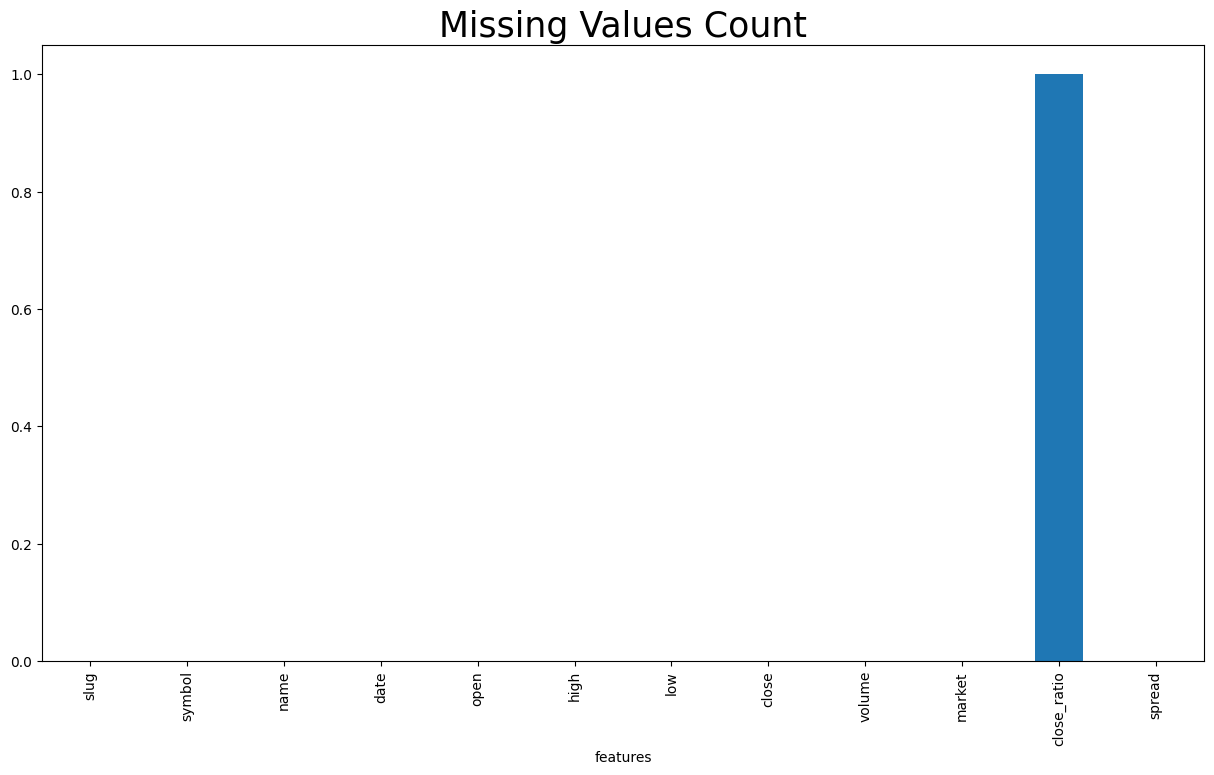

In [ ]:
missing = df_final.isna().sum().reset_index()
missing.columns = ['features', 'total_missing']
missing['percent'] = (missing['total_missing'] / len(df_final)) * 100
missing.index = missing['features']
del missing['features']
plt.figure(figsize=(15,8))
missing['total_missing'].plot(kind = 'bar')
plt.title('Missing Values Count', fontsize = 25)

* We have one missing value in `close_ratio` column. So remove it.

In [ ]:
# Fill null values with the mean of the column
mean_close_ratio = df_final['close_ratio'].mean()
df_final['close_ratio'].fillna(mean_close_ratio, inplace=True)

* Again check for it.

In [ ]:
#Checks null values
print(df_final.isnull().sum())
print('Total number of null values: ', df_final.isnull().sum().sum())

slug           0
symbol         0
name           0
date           0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64
Total number of null values:  0


* We are sucessfully deal with `null value`.  

# Correlation Coefficients:

**Print correlation coefficient of every column with `close` column:**

In [ ]:
all_corr = df.corr().abs()['close'].sort_values(ascending = False)
print(all_corr.to_string())

close          1.000000
high           0.999076
low            0.998619
open           0.996950
market         0.996783
volume         0.939596
spread         0.861417
close_ratio    0.041081


<ipython-input-39-613043c7b3e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_corr = df.corr().abs()['close'].sort_values(ascending = False);


* The output displays the absolute correlation coefficients of each column in the DataFrame df with the "close" column (presumably representing the "Adj Close" price) in descending order.
* The correlation values range from 1.0 (perfect positive correlation) to approximately 0.017 (very weak positive correlation). The correlation between "close" and "high" is very close to 1, indicating a very strong positive correlation. Similarly, "close" has a very strong correlation with "high," "low," and "open" columns. The "volume" column also shows a strong positive correlation with "close," but it is relatively weaker than the correlations with the price-related columns. The "spread" column has a moderate positive correlation with "close."

**Plot pair correlation of all features:**

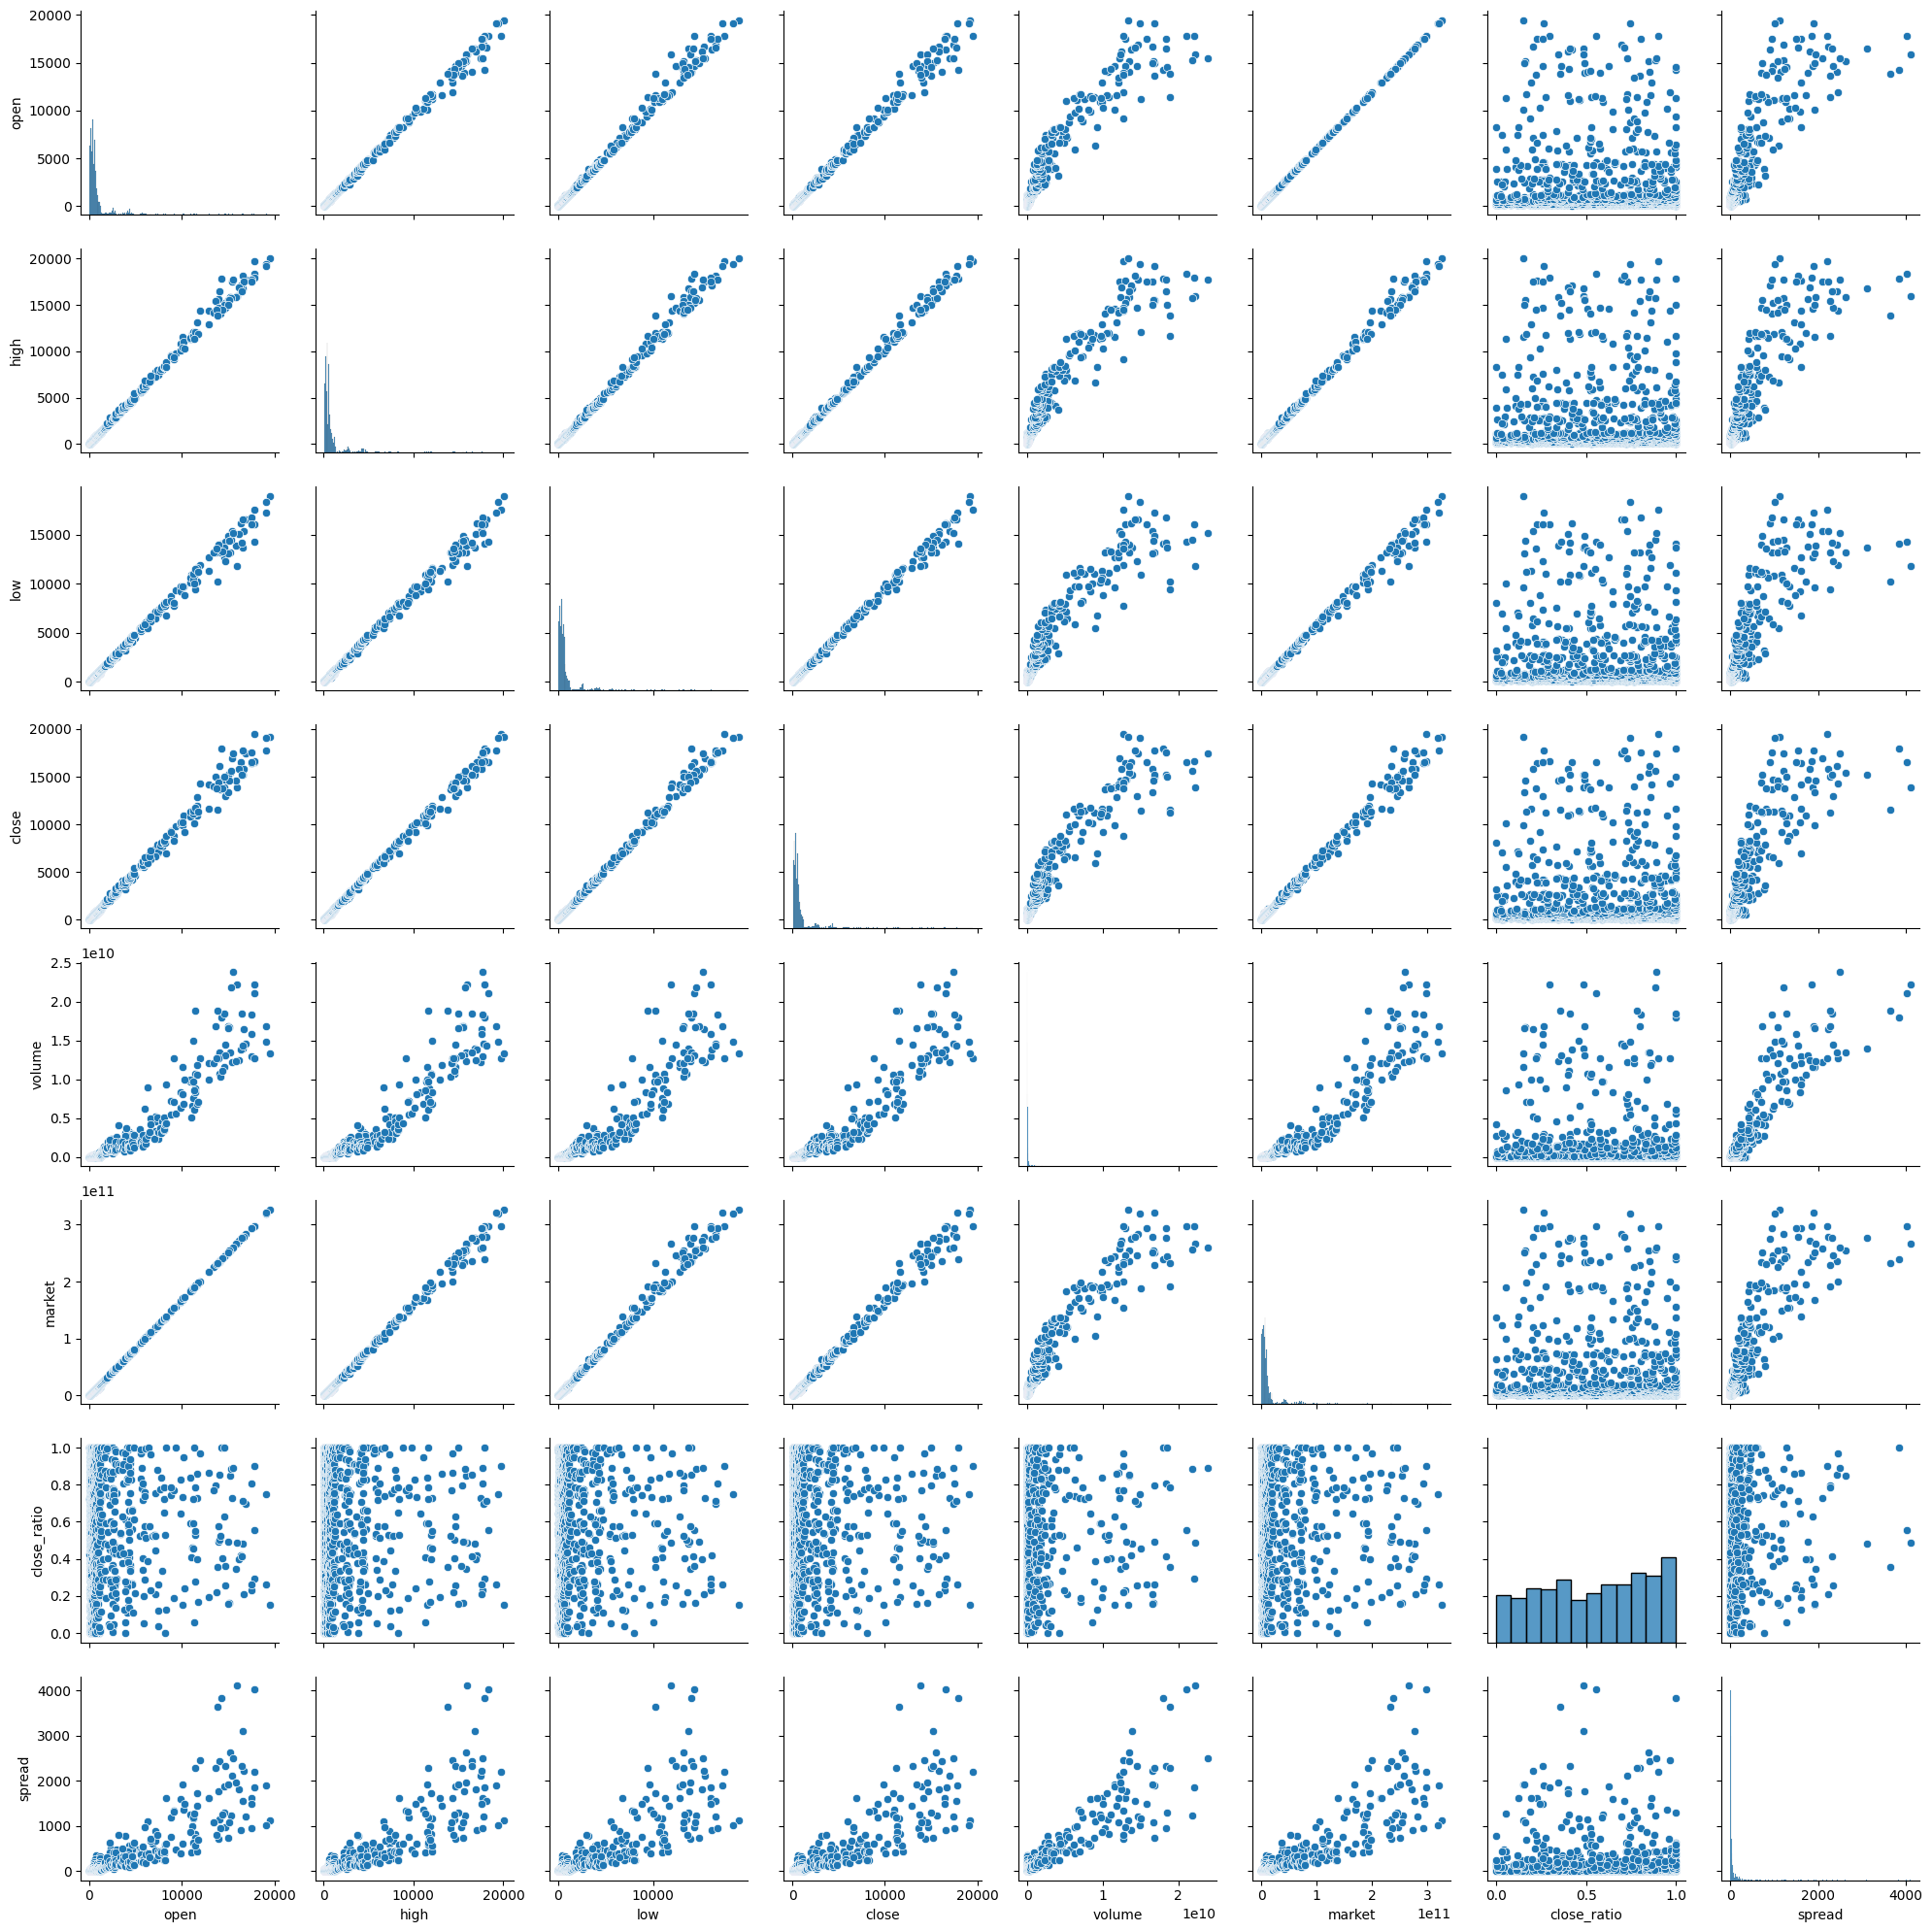

In [ ]:
sns.pairplot(df)
plt.tight_layout()

 - The code creates a pair plot (scatter plot matrix) to visualize the pairwise correlation between all numeric features (columns) in the DataFrame df. It uses the Seaborn library for creating the pair plot.

**Extracting Time-Related Features**

In [ ]:
# Extract day, month, week, quarter, and year. Then, set Date column as index:

df['date'] = pd.to_datetime(df['date'])
df['Day']= df['date'].dt.weekday
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df['Week'] = df['date'].dt.week
df['Quarter'] = df['date'].dt.quarter

#Sets Date column as index
df = df.set_index('date')

In [ ]:
#Checks dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1745 entries, 2013-04-28 to 2018-02-05
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   slug         1745 non-null   object 
 1   symbol       1745 non-null   object 
 2   name         1745 non-null   object 
 3   open         1745 non-null   float64
 4   high         1745 non-null   float64
 5   low          1745 non-null   float64
 6   close        1745 non-null   float64
 7   volume       1745 non-null   float64
 8   market       1745 non-null   float64
 9   close_ratio  1745 non-null   float64
 10  spread       1745 non-null   float64
 11  Day          1745 non-null   int64  
 12  Month        1745 non-null   int64  
 13  Year         1745 non-null   int64  
 14  Week         1745 non-null   int64  
 15  Quarter      1745 non-null   int64  
dtypes: float64(8), int64(5), object(3)
memory usage: 231.8+ KB
None


 - The overall purpose of this code is to enhance the DataFrame's time-based analysis capabilities by creating new columns that capture specific time components (day, month, year, week, and quarter) from the "date" column. Additionally, setting the "date" column as the index facilitates easy time-based indexing and retrieval of data. This can be
particularly useful when analyzing and visualizing time series data and conducting time-based operations and aggregations on the DataFrame.

**Plot the correlation between each feature by using heatmap:**

<ipython-input-46-06c34b88befc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask =np.triu(np.ones_like(df_final.corr(), dtype=np.bool));
<ipython-input-46-06c34b88befc>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask =np.triu(np.ones_like(df_final.corr(), dtype=np.bool));
<ipython-input-46-06c34b88befc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of nume

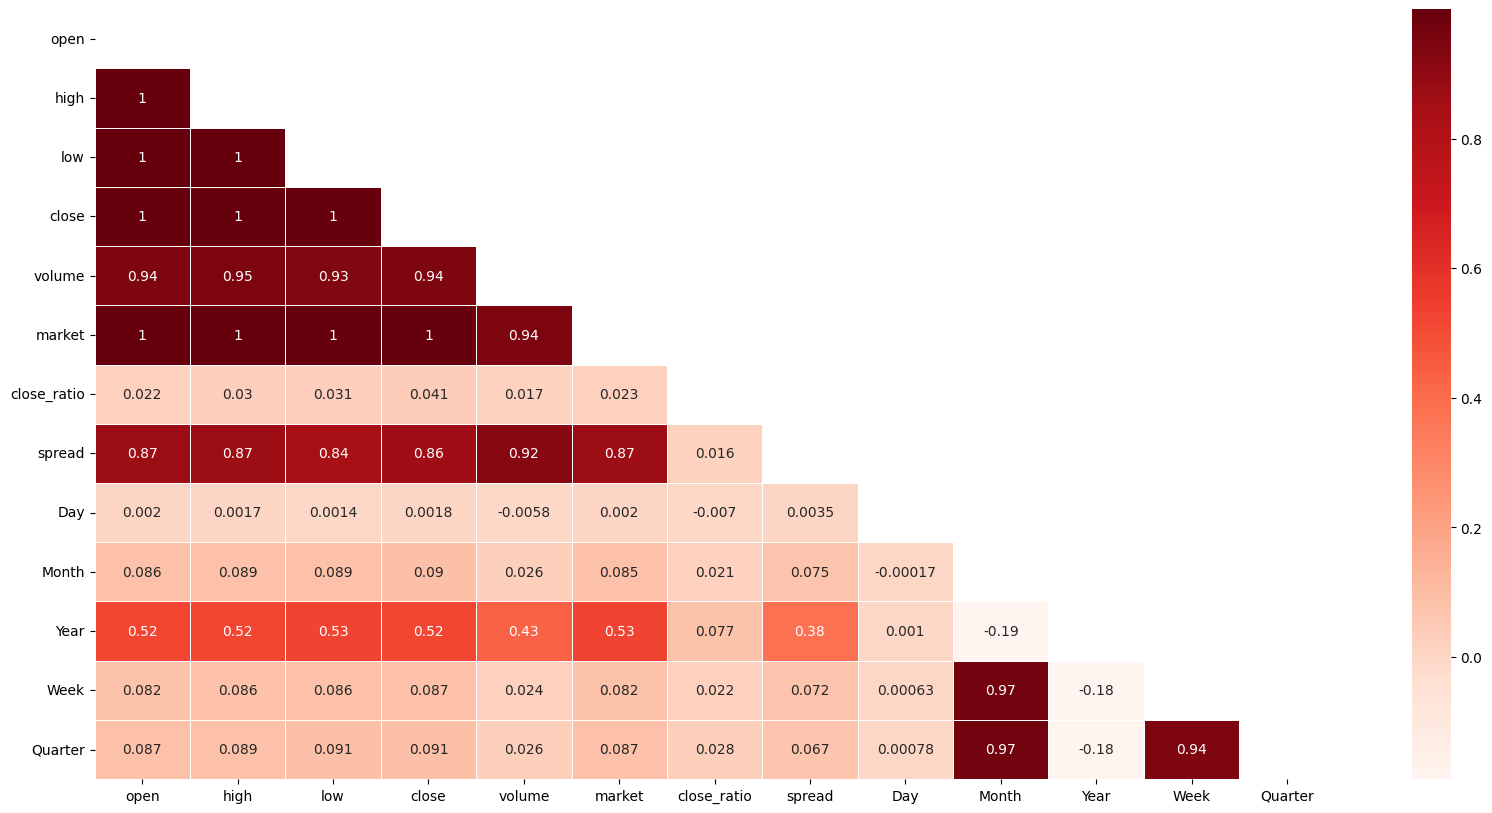

In [ ]:
fig, ax = plt.subplots(figsize= (20,10))
mask =np.triu(np.ones_like(df_final.corr(), dtype=np.bool))
sns.heatmap(df_final.corr(),annot=True, cmap="Reds", mask=mask, linewidth=0.5)

- The resulting heatmap will display the correlation between each feature in the DataFrame df_final. Darker shades of red indicate higher positive correlations, while lighter shades represent weaker or negative correlations. The diagonal of the heatmap will show perfect correlation (correlation of 1) for each feature with itself. The upper triangle of the heatmap will be masked to avoid redundant information due to symmetry in the correlation matrix.

**Converting Time-Related Features into Meaningful Strings**

In [ ]:
df_dummy =df_final.copy()

#Converts days and months from numerics to meaningful string

days = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
    5: 'Friday', 6: 'Saturday'
}
df_dummy['Day'] = df_dummy['Day'].map(days)

months = {
    0: 'January', 1: 'February', 2: 'March', 3: 'April', 4: 'May', 5: 'June',
    6: 'July', 7: 'August', 8: 'September', 9: 'October', 10: 'November',
    11: 'December'
}
df_dummy['Month'] = df_dummy['Month'].map(months)

quarters = {
    0: 'Jan-March', 1: 'April-June', 2: 'July-Sept', 3: 'Oct-Dec'
}
df_dummy['Quarter'] = df_dummy['Quarter'].map(quarters)

 - After executing this code, the DataFrame df_dummy will have the "Day," "Month," and "Quarter" columns with meaningful string representations instead of numeric values. This transformation facilitates more intuitive and readable visualizations and analyses.

**Plot case distribution of Year:**

Percentage values:
2016    20.974212
2014    20.916905
2015    20.916905
2017    20.916905
2013    14.212034
2018     2.063037
Name: Year, dtype: float64
Count values:
2016    366
2014    365
2015    365
2017    365
2013    248
2018     36
Name: Year, dtype: int64


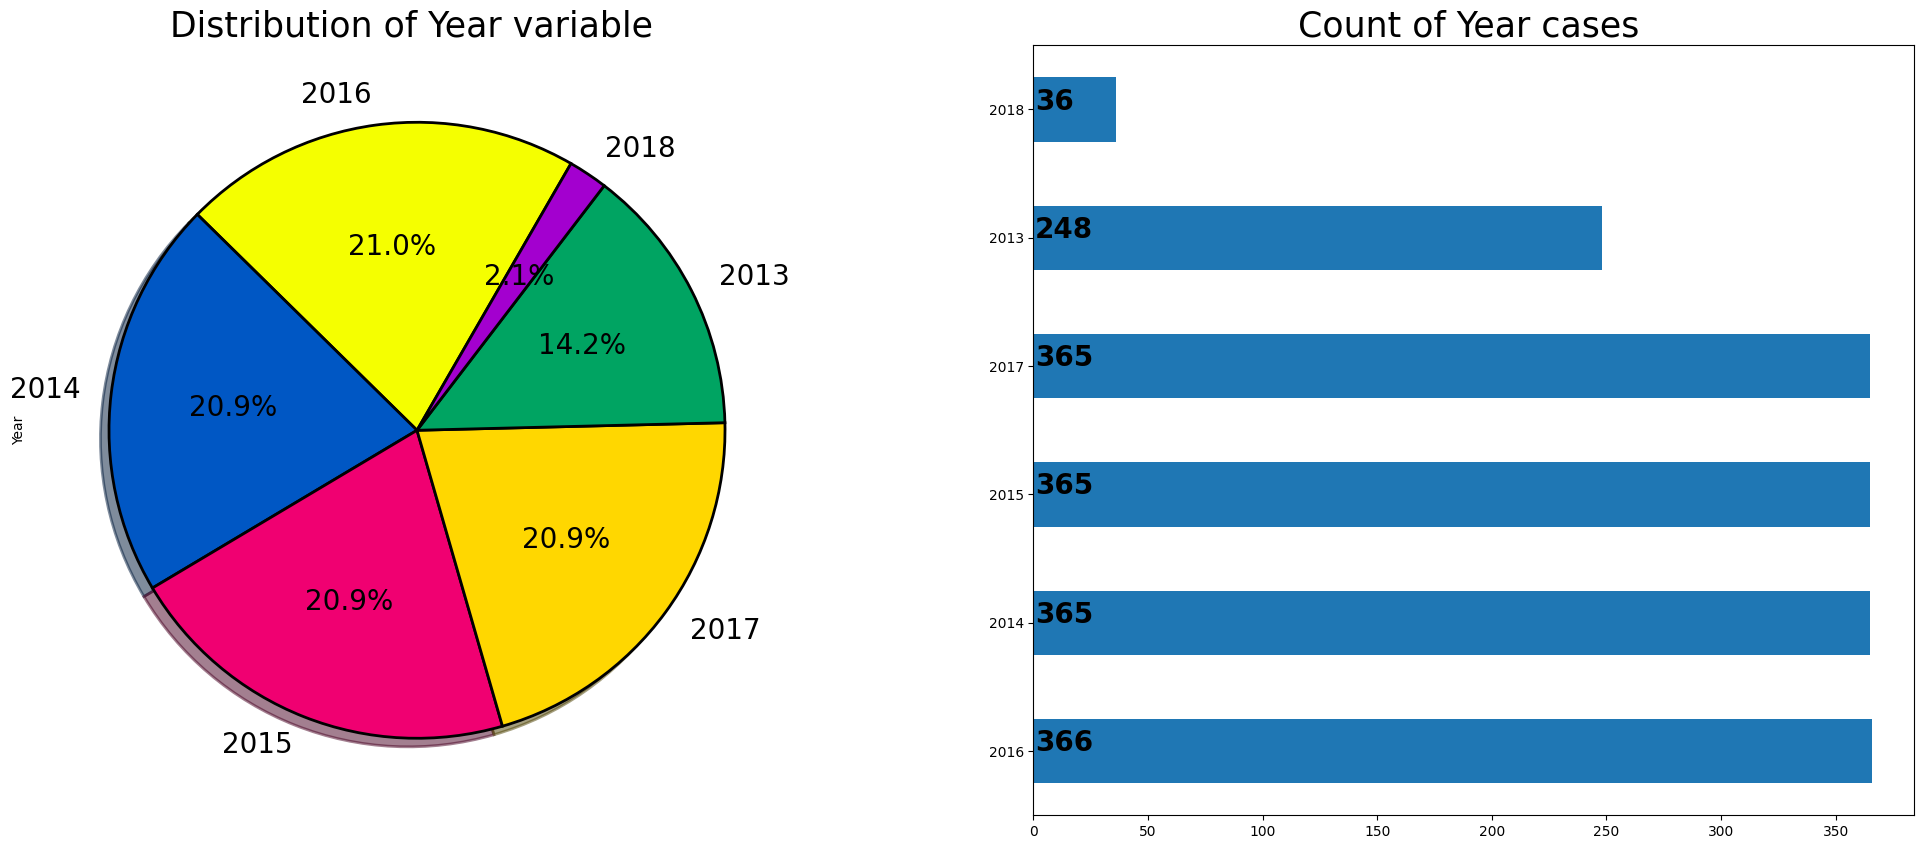

In [ ]:
def plot_pie_bar_chart(df, var, title=''):
    plt.figure(figsize=(25, 10))

    plt.subplot(121)
    label_list = list(df[var].value_counts().index)

    df[var].value_counts().plot.pie(autopct="%1.1f%%",
                                    colors=sns.color_palette("prism", 7),
                                    startangle=60,
                                    labels=label_list,
                                    wedgeprops={"linewidth": 2, "edgecolor": "k"},
                                    shadow=True,
                                    textprops={'fontsize': 20})
    plt.title("Distribution of " + var + " variable " + title, fontsize=25)

    value_counts = df[var].value_counts()

    # Print percentage values
    percentages = value_counts / len(df) * 100
    print("Percentage values:")
    print(percentages)

    plt.subplot(122)
    ax = df[var].value_counts().plot(kind="barh")
    for i, j in enumerate(df[var].value_counts().values):
        ax.text(.7, i, j, weight="bold", fontsize=20)
    plt.title("Count of " + var + " cases " + title, fontsize=25)

    # Print count values
    print("Count values:")
    print(value_counts)

    plt.show()


# Plots case distribution of 'Year' for the DataFrame df_dummy
plot_pie_bar_chart(df_dummy, "Year")


 - The code defines a function called plot_pie_bar_chart to create a combination of a pie chart and a horizontal bar plot as subplots. The function is used to visualize the distribution of a categorical variable from the DataFrame df_dummy, specifically the "Year" variable.
 - **Conclusion**:
The analysis reveals that the dataset contains data from the years 2013 to 2018. The majority of the data points fall into the years 2016, 2017, 2015, and 2014, which each have 365 days of data, indicating that the data may be available throughout the entire year for these years. On the other hand, the year 2018 and, to a greater extent, the year 2013 have fewer data points, with 333 and 248 days, respectively. This could suggest incomplete data or data gaps for these years.

**Plot case distribution of Day:**

Percentage values:
Saturday     14.326648
Sunday       14.326648
Monday       14.269341
Tuesday      14.269341
Wednesday    14.269341
Thursday     14.269341
Friday       14.269341
Name: Day, dtype: float64
Count values:
Saturday     250
Sunday       250
Monday       249
Tuesday      249
Wednesday    249
Thursday     249
Friday       249
Name: Day, dtype: int64


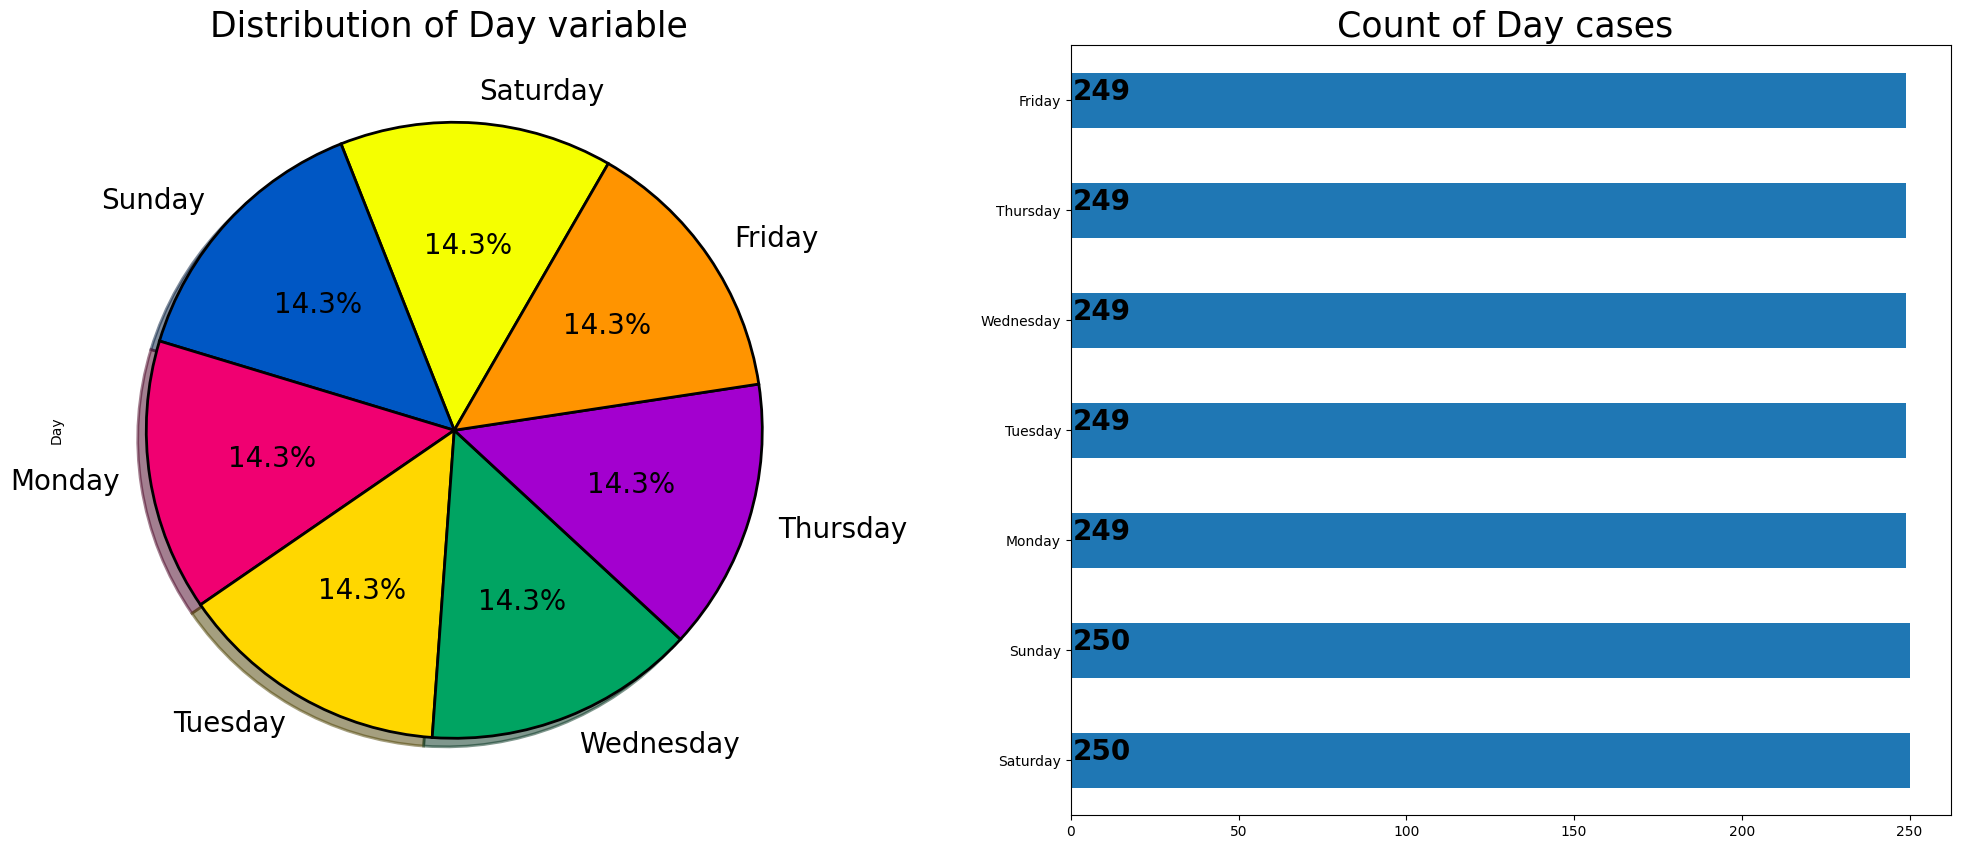

In [ ]:
plot_pie_bar_chart(df_dummy, "Day")

**Plot case distribution of Month:**

Percentage values:
June         8.882521
August       8.882521
September    8.882521
November     8.882521
February     8.882521
July         8.595989
October      8.595989
December     8.595989
April        7.106017
May          7.048711
March        6.762178
Name: Month, dtype: float64
Count values:
June         155
August       155
September    155
November     155
February     155
July         150
October      150
December     150
April        124
May          123
March        118
Name: Month, dtype: int64


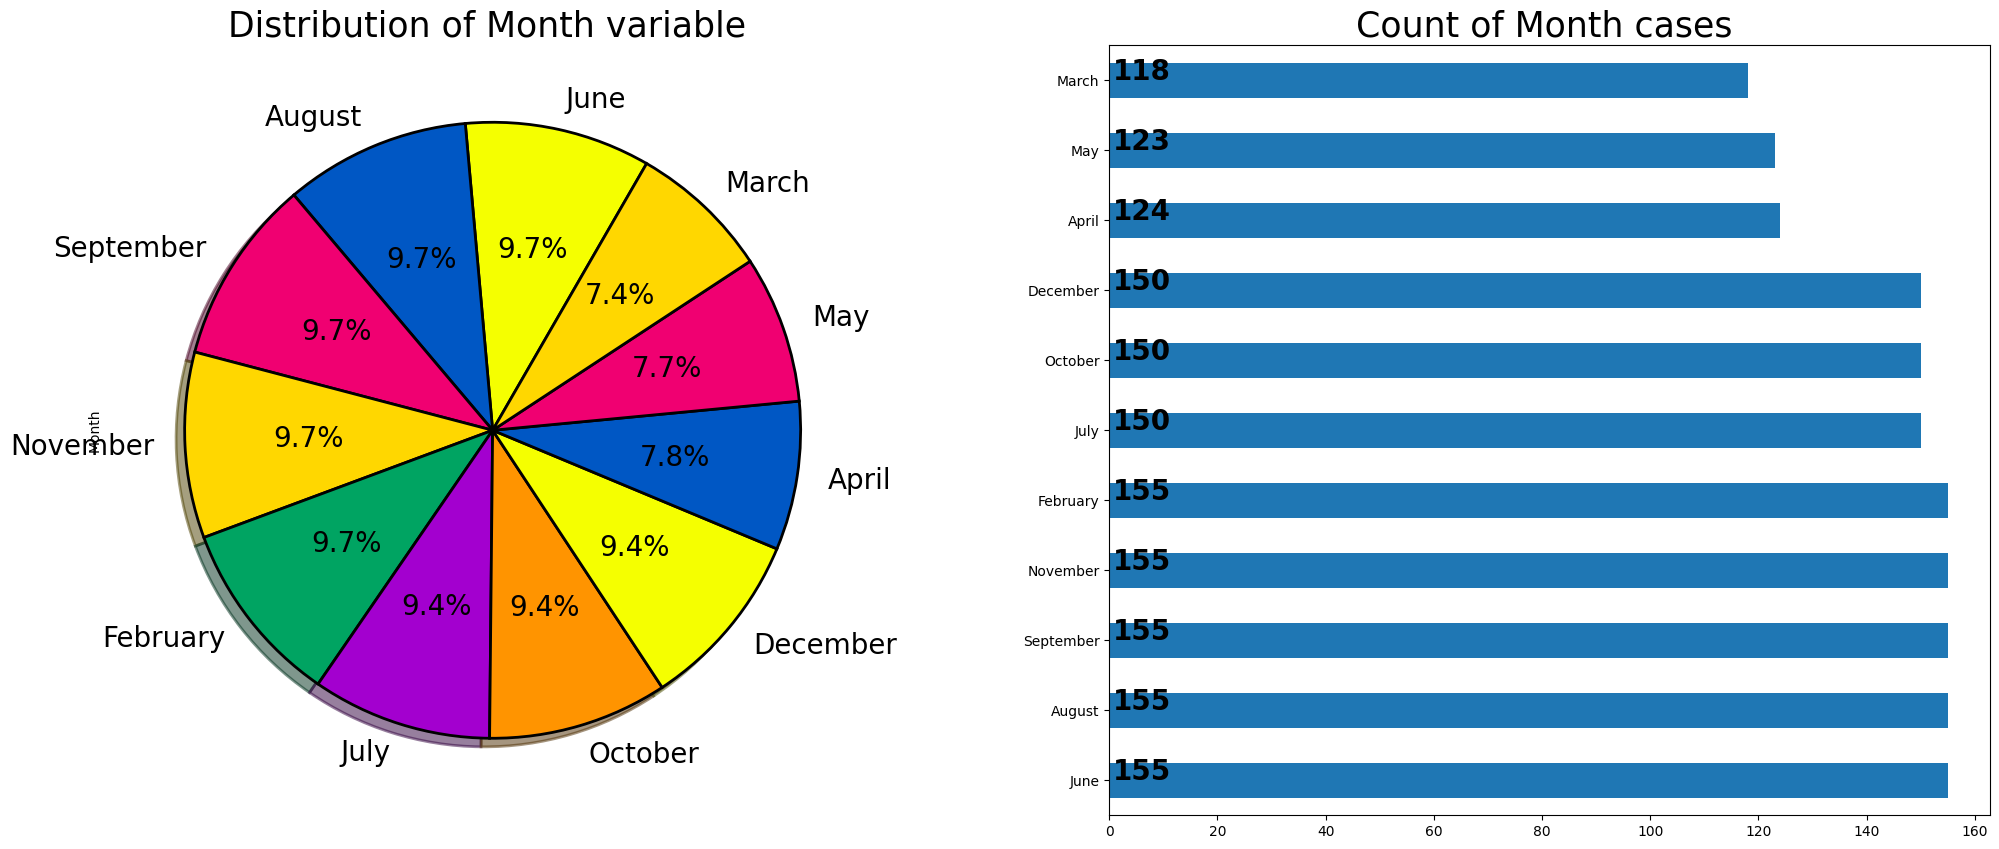

In [ ]:
plot_pie_bar_chart(df_dummy, "Month")

**Plot the scatter distribution of open versus close versus Year:**

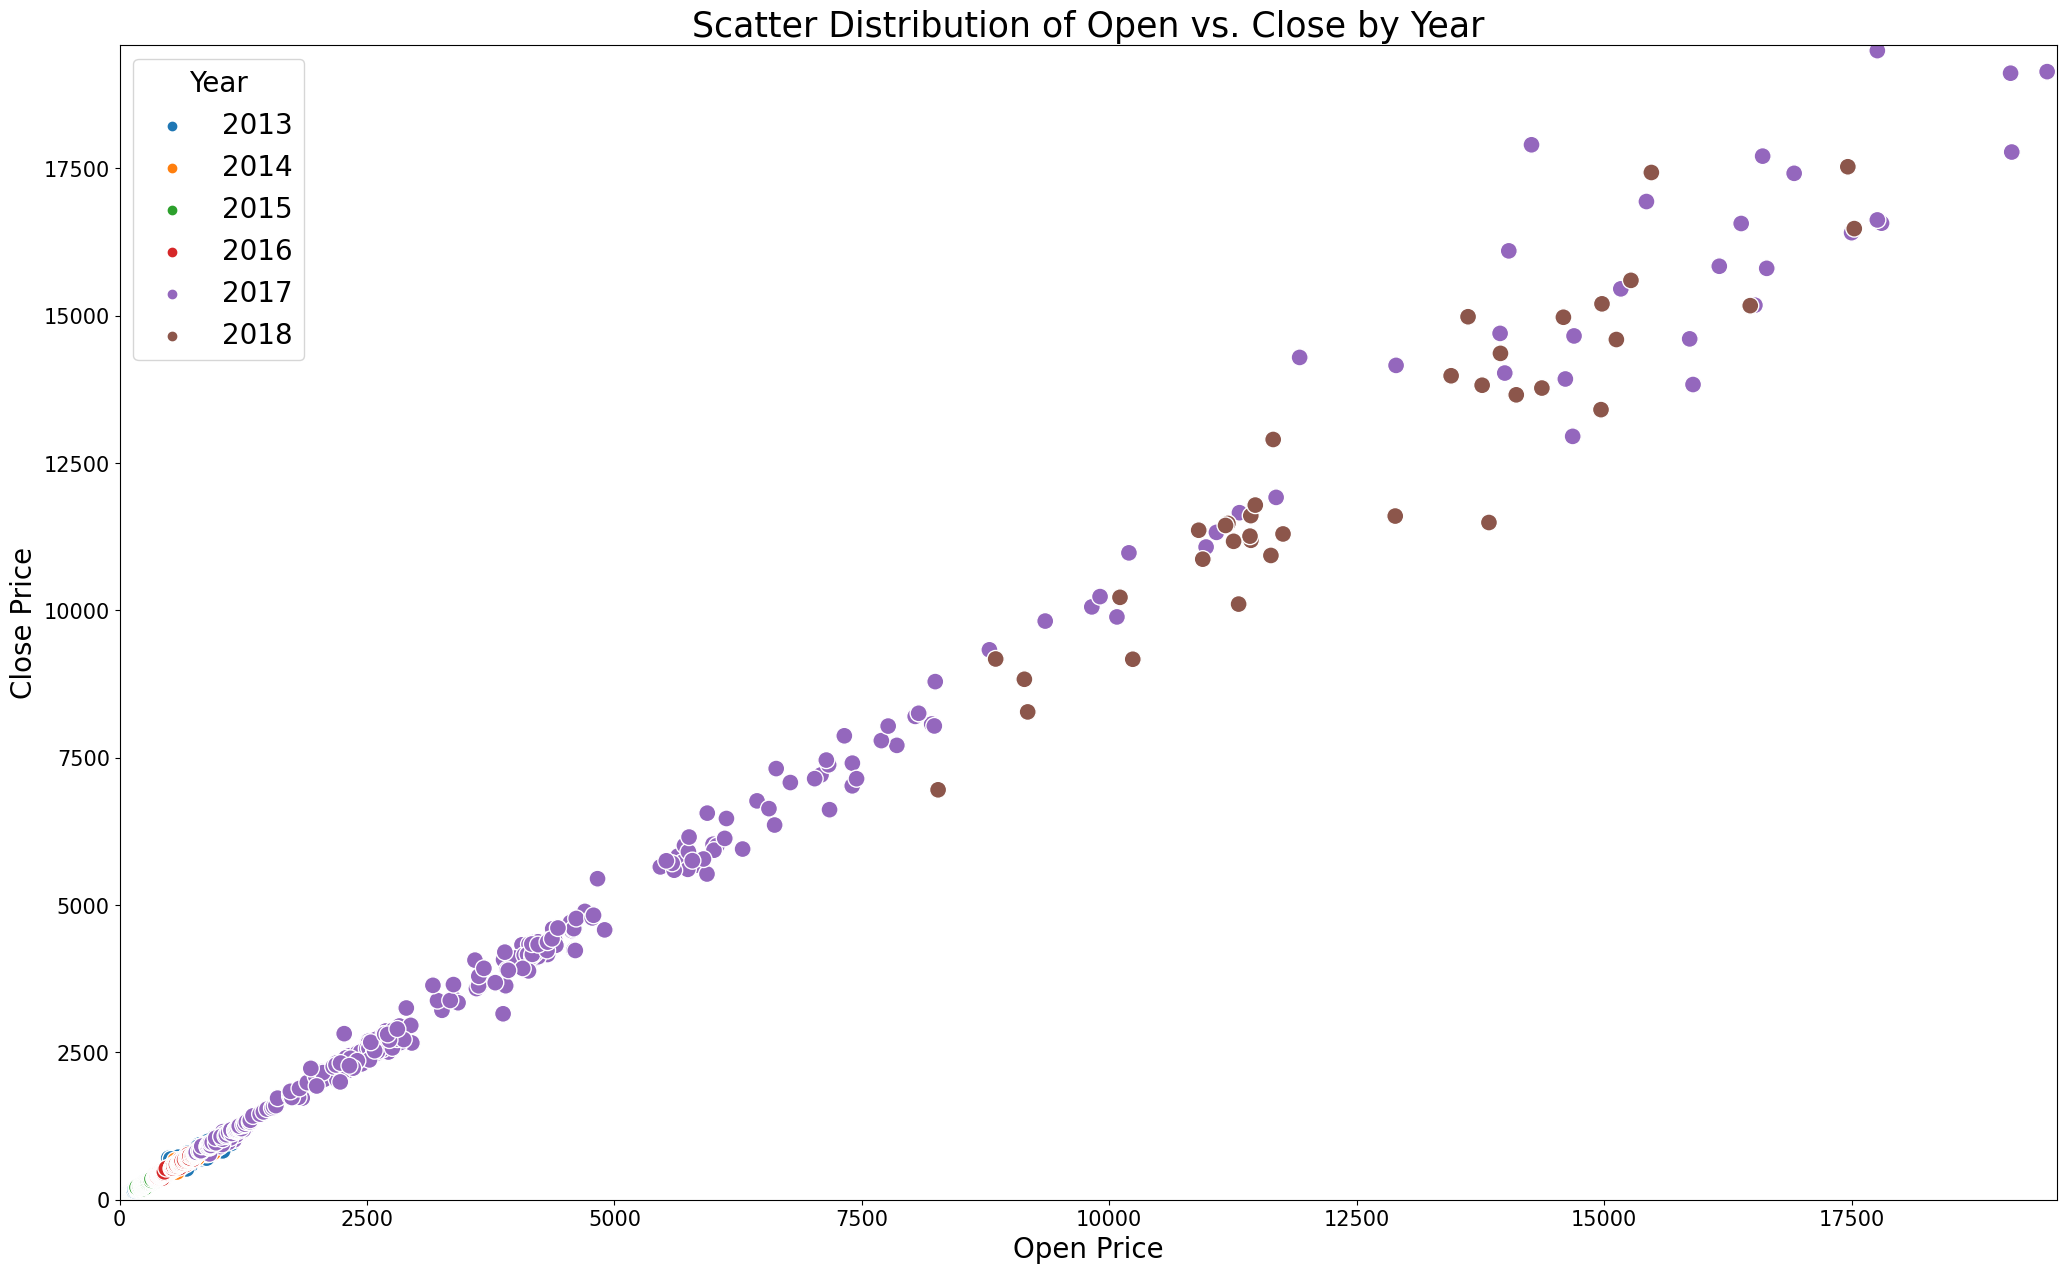

In [ ]:
def plot_scatter_distribution(data, x_col, y_col, hue_col, palette="tab10", marker_size=150):
    # Create the scatter plot with bigger dots and appealing color
    fig, ax1 = plt.subplots(figsize=(25, 15))
    sns.scatterplot(data=data, x=x_col, y=y_col, hue=hue_col, palette=palette, ax=ax1, s=marker_size)

    # Set the title and labels
    plt.title("Scatter Distribution of {} vs. {} by {}".format(x_col.capitalize(), y_col.capitalize(), hue_col.capitalize()), fontsize=25)
    plt.xlabel(x_col.capitalize() + " Price", fontsize=20)
    plt.ylabel(y_col.capitalize() + " Price", fontsize=20)

    # Customize the legend
    plt.legend(title=hue_col.capitalize(), title_fontsize=20, fontsize=20)

    # Adjust the tick labels and axis limits
    ax1.tick_params(axis='both', labelsize=15)
    ax1.set_xlim(0, data[x_col].max() + 100)  # Adjust the x-axis limit slightly
    ax1.set_ylim(0, data[y_col].max() + 100)  # Adjust the y-axis limit slightly

    # Show the plot
    plt.show()

# Example usage
# Plots the scatter distribution of 'open' versus 'close' versus 'Year'
plot_scatter_distribution(df_dummy, 'open', 'close', 'Year')


 - The resulting scatter plot will visualize the relationship between "open" and "close" prices of the cryptocurrency, with the data points colored based on the "Year" variable. The plot will have a customized title, axis labels, and a legend, making it easier to interpret the data and identify trends based on years.

**Plot the scatter distribution of low versus high versus Quarter:**

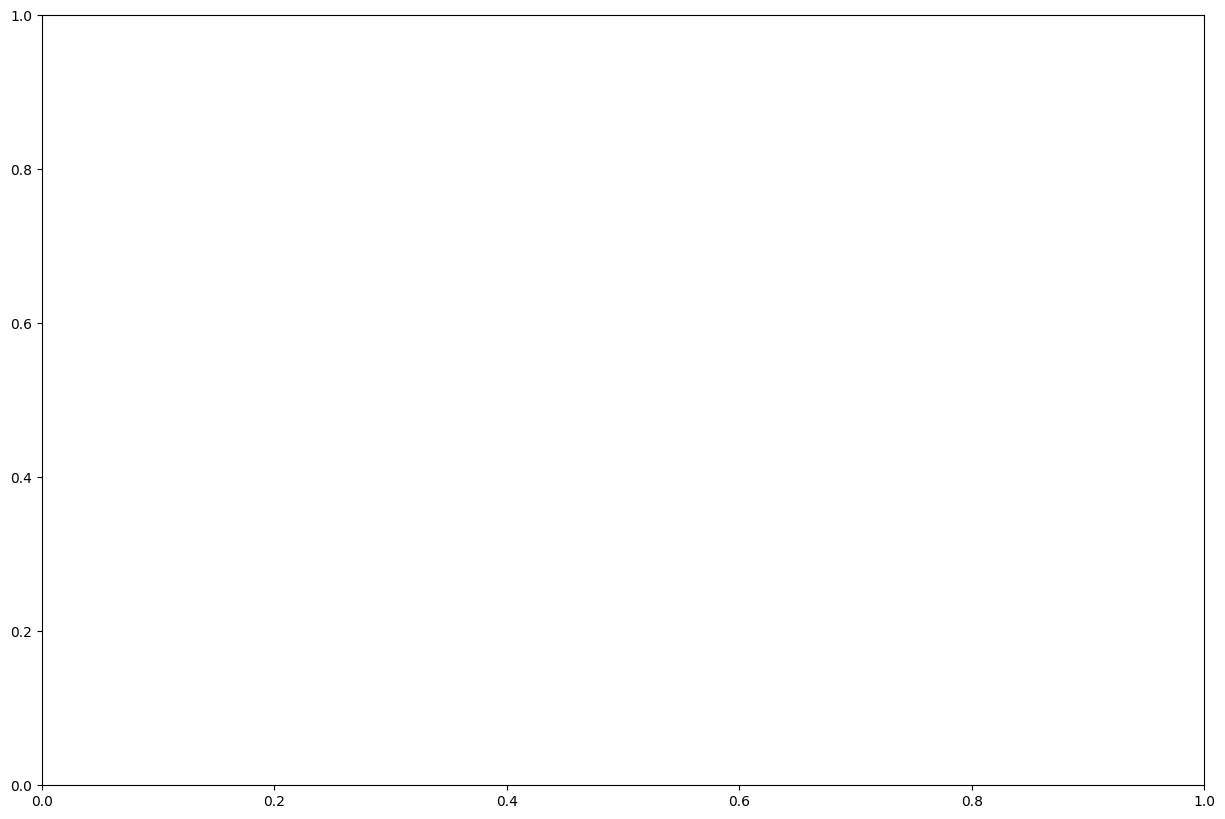

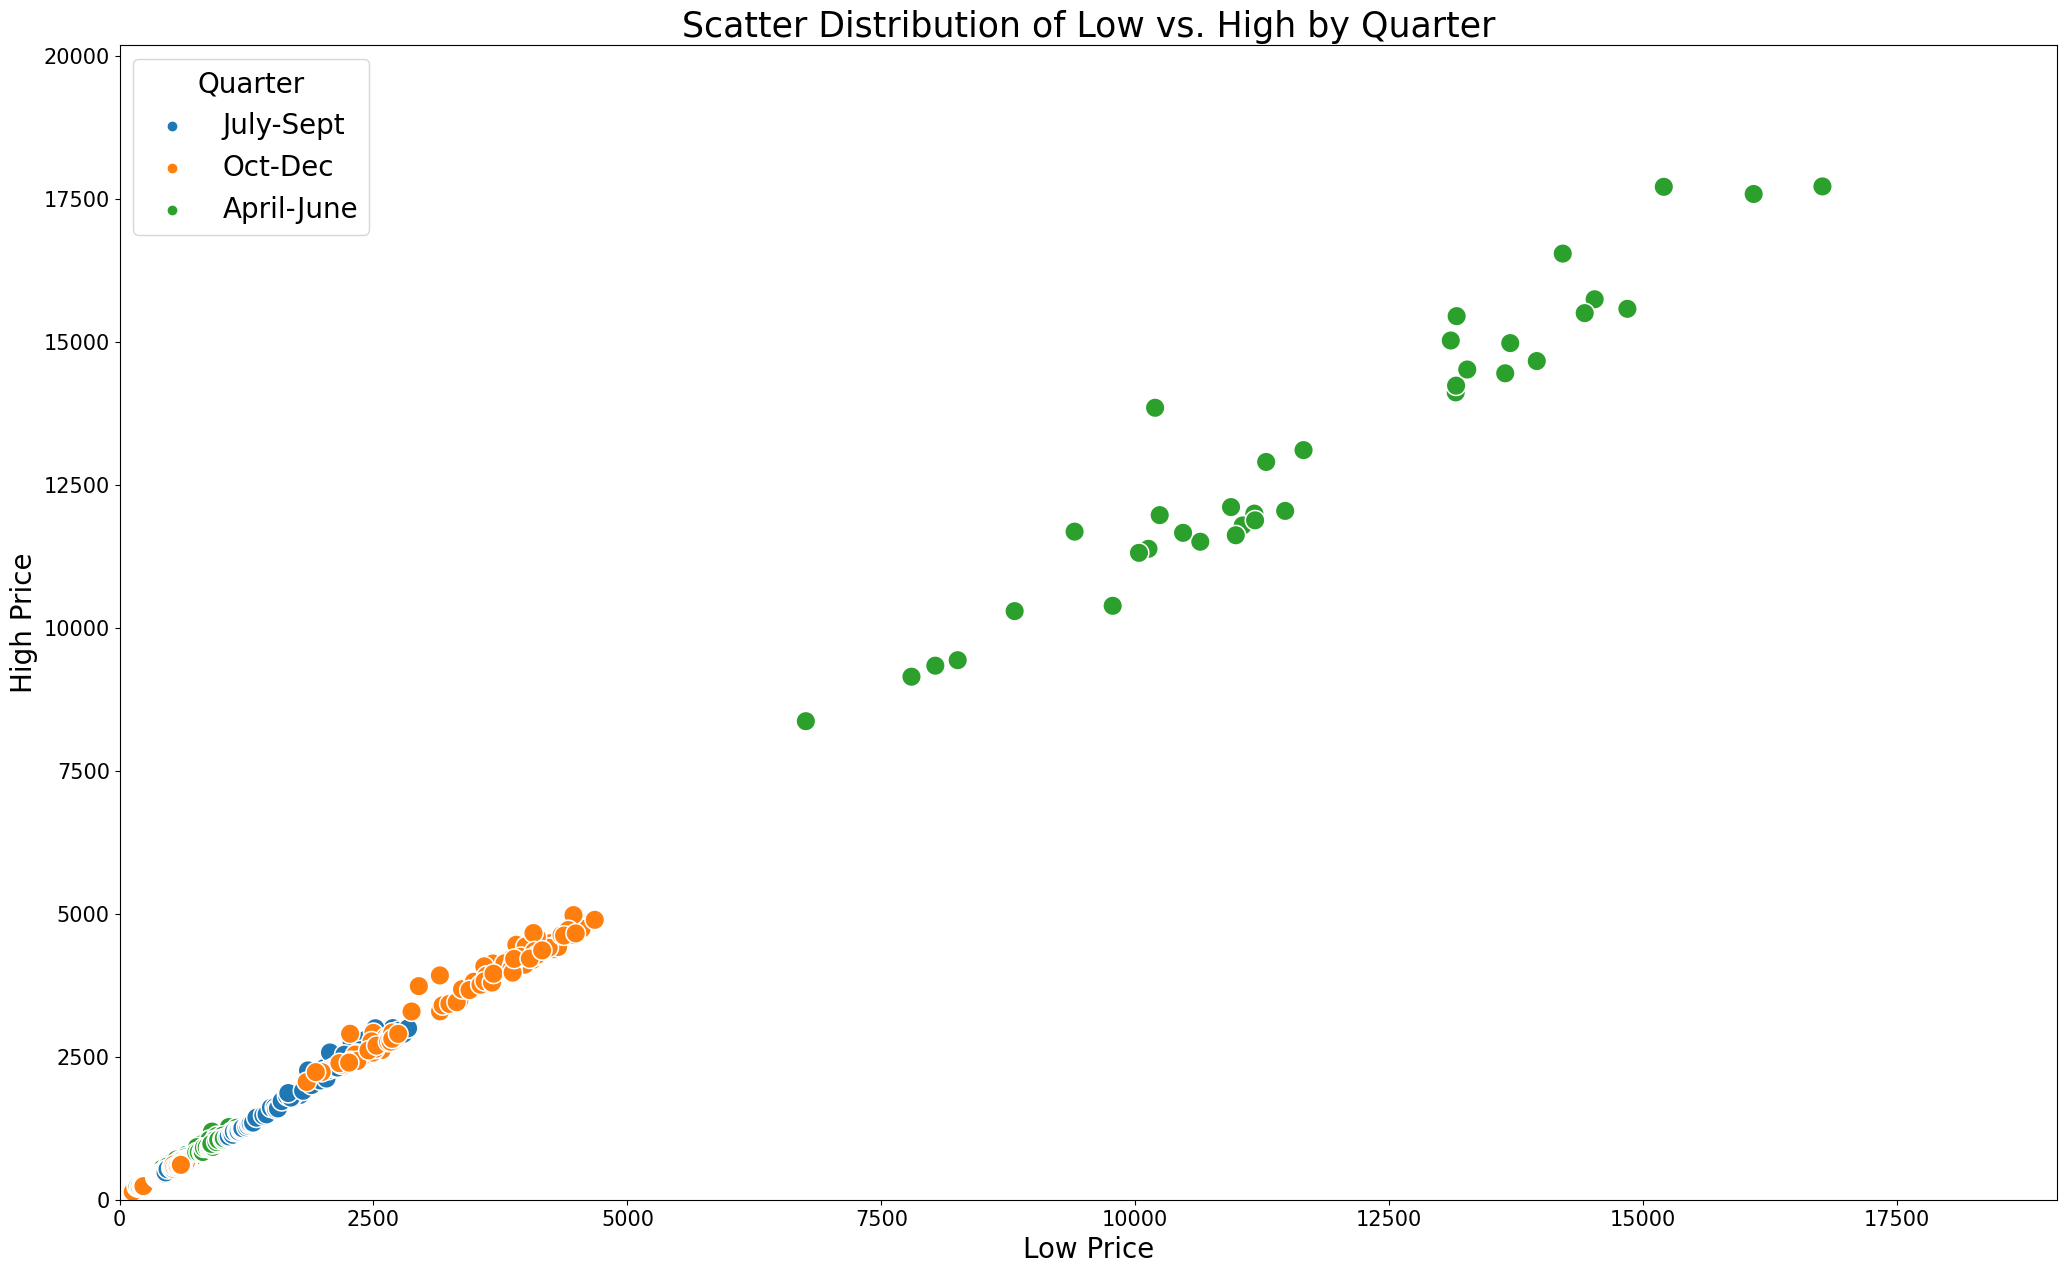

In [ ]:
#Plots the scatter distribution of low versus high versus Quarter
fig, ax1 = plt.subplots(figsize= (15,10))
plot_scatter_distribution(df_dummy, x_col="low", y_col="high", hue_col="Quarter", palette="tab10", marker_size=200)

**Plot the scatter distribution of high versus volume versus Day:**

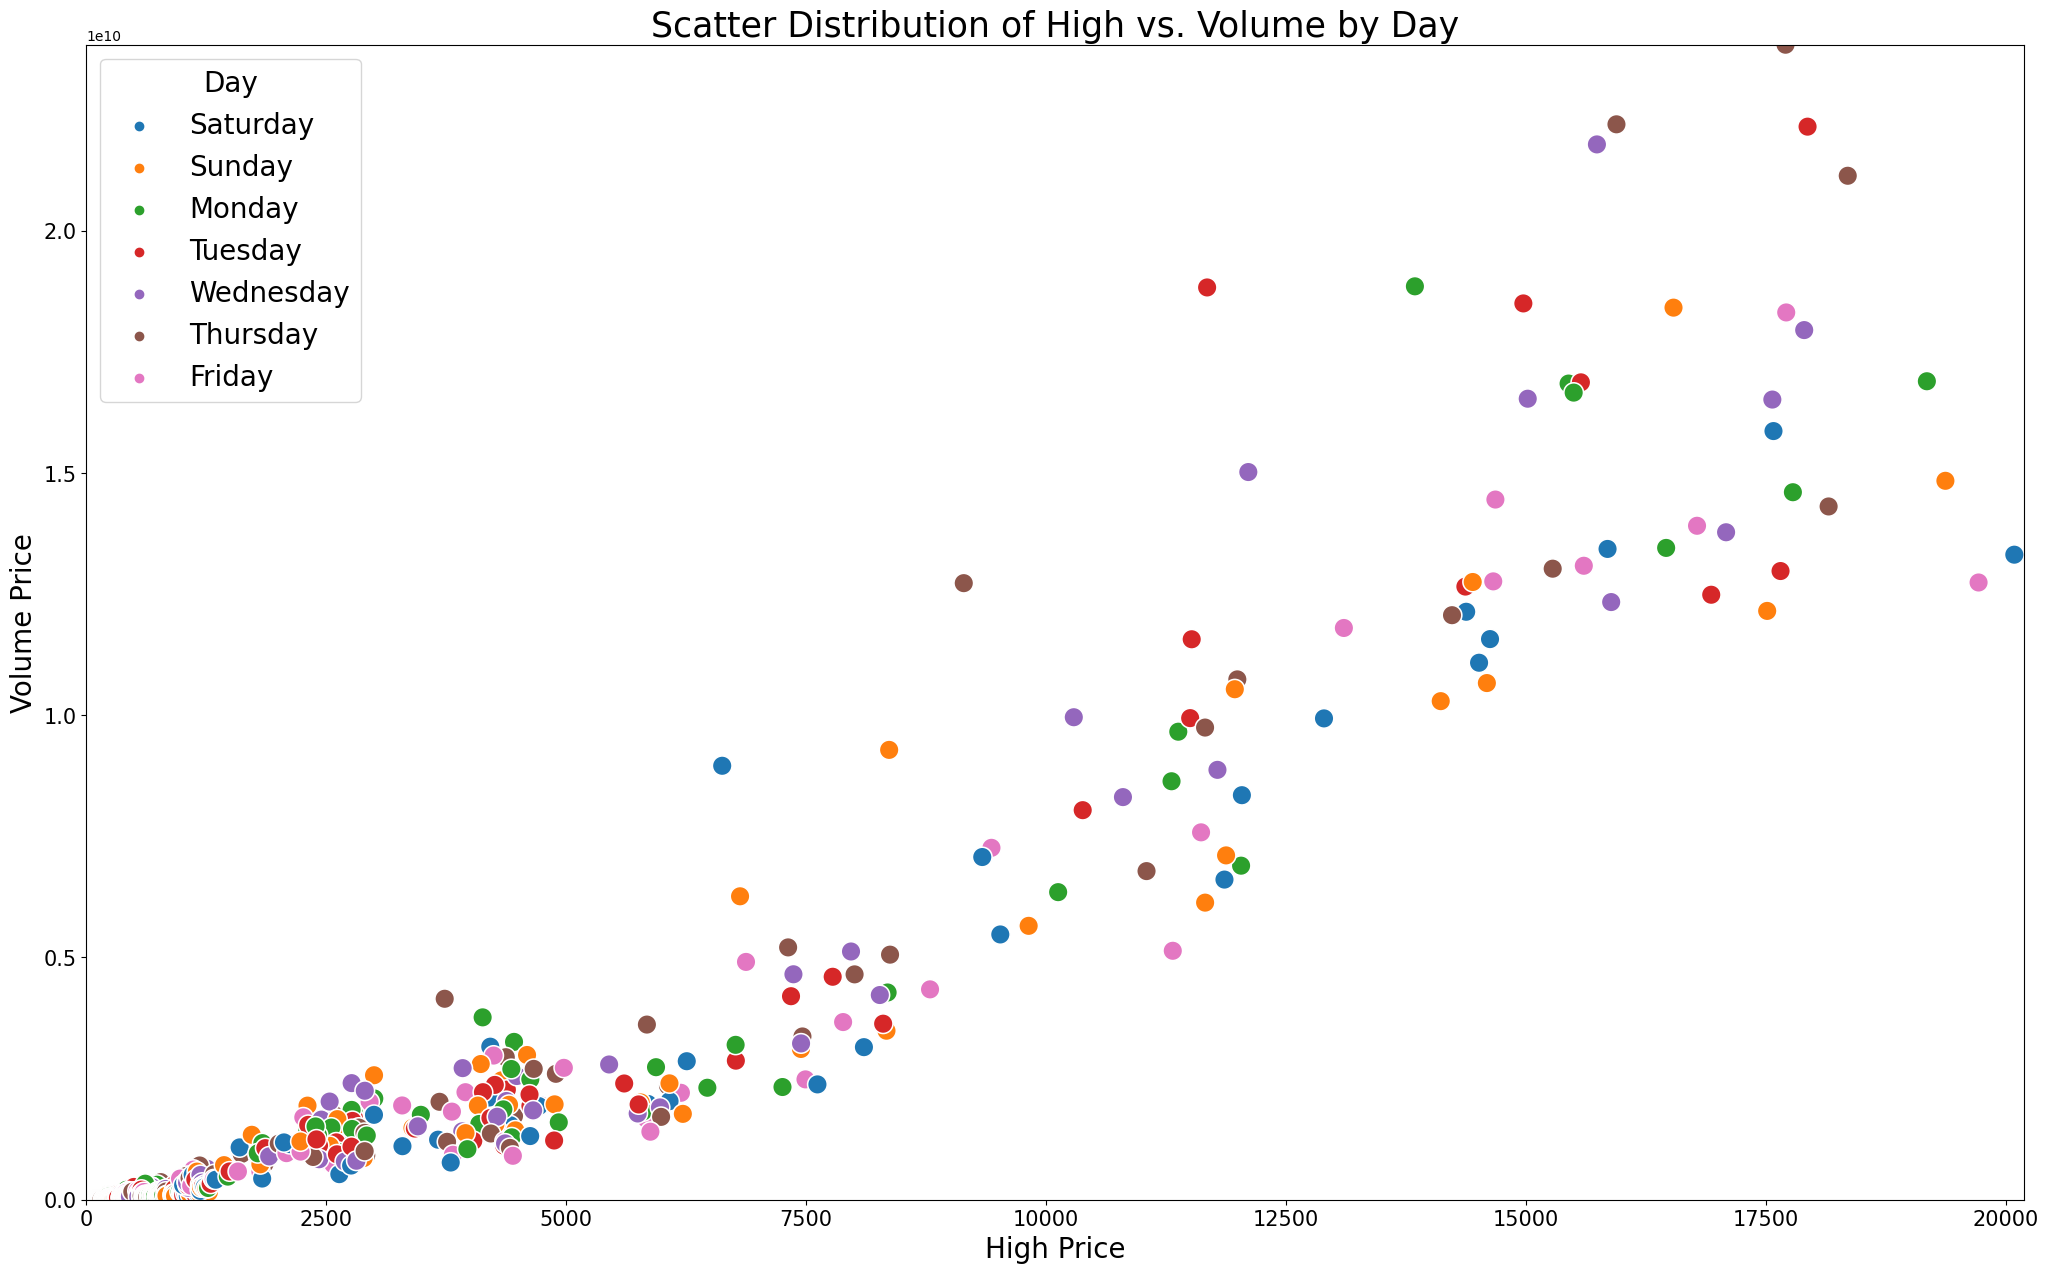

In [ ]:
#Plots the scatter distribution of high versus volume versus Day
plot_scatter_distribution(df_dummy, x_col="high", y_col= "volume", hue_col="Day", palette= "tab10", marker_size=200)

**Define plot_group() to plot plot distribution of a grouped dataframe:**

In [ ]:
# Defines function to plot distribution of a grouped dataframe
def plot_group(df, title=""):
    plt.figure(figsize=(20, 10))

    # Pie chart
    plt.subplot(121)
    label_list = list(df.index)
    pie_chart = df.plot.pie(autopct="%.2f%%",
                            colors=sns.color_palette("prism", 7),
                            startangle=60,
                            labels=label_list,
                            wedgeprops={"linewidth": 2, "edgecolor": "k"},
                            shadow=True,
                            textprops={"fontsize": 16})
    plt.title(title, fontsize=25)

    # Print percentage values to the console
    percentages = df / df.sum() * 100
    print("Percentage values:")
    print(percentages)

    # Bar chart
    plt.subplot(122)
    ax = df.plot(kind='barh')
    for i, j in enumerate(df.values):
        ax.text(.7, i, j, weight='bold', fontsize=15)
    plt.title(title, fontsize=25)

    # Print count values to the console
    print('Count values:')
    print(df)

    plt.show()

**Plot which year of the week have most volumes:**

Percentage values:
Year
2013     0.010104
2014     0.661109
2015     0.893265
2016     2.269942
2017    62.778254
2018    33.387326
Name: volume, dtype: float64
Count values:
Year
2013    1.399848e+08
2014    9.159181e+09
2015    1.237553e+10
2016    3.144837e+10
2017    8.697464e+11
2018    4.625568e+11
Name: volume, dtype: float64


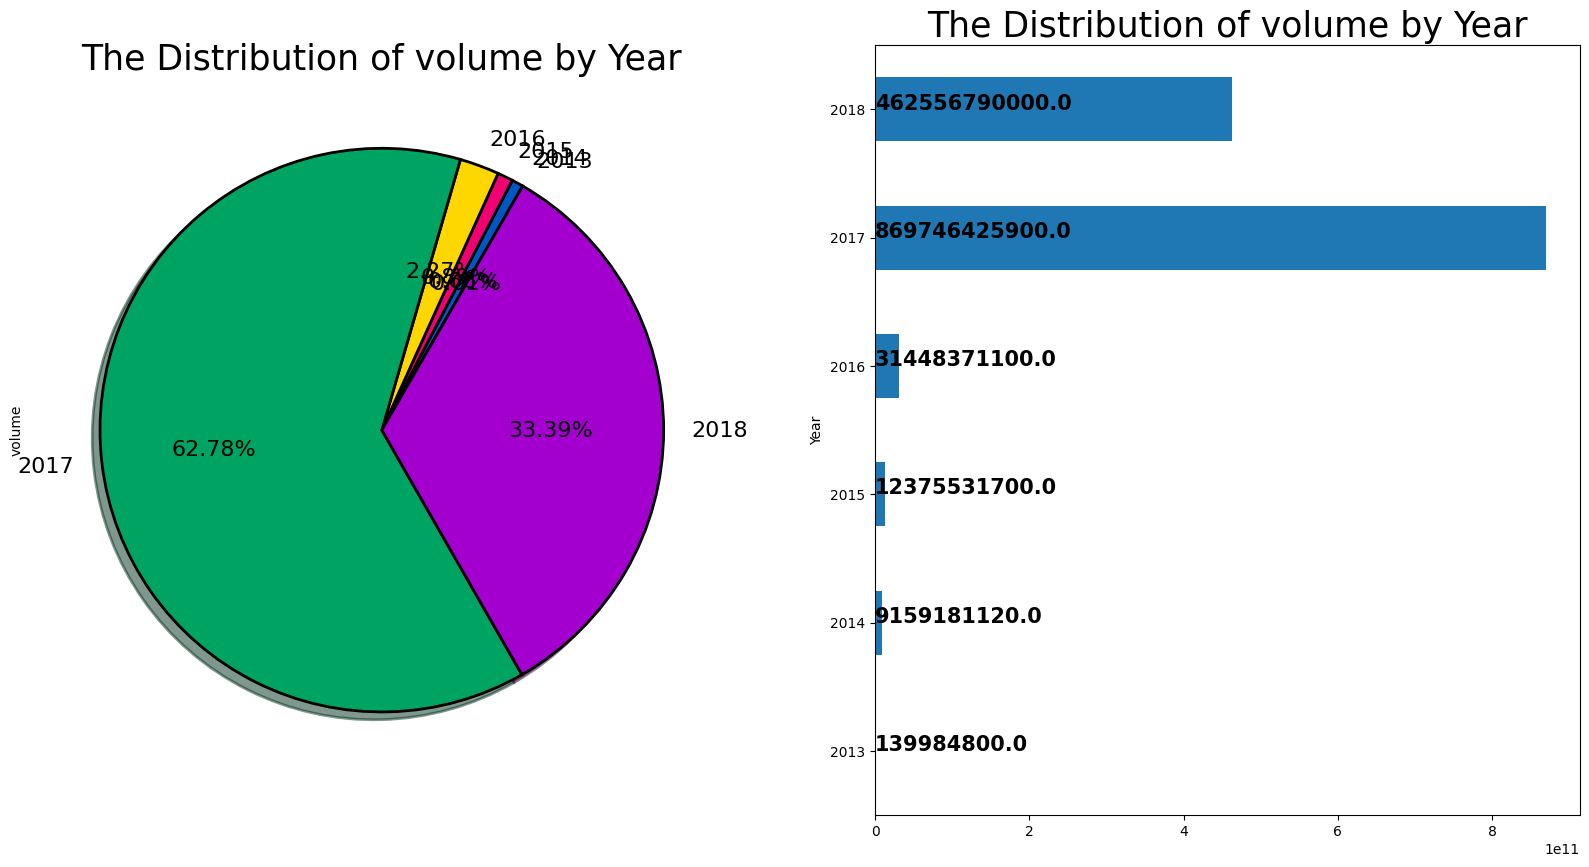

In [ ]:
plot_group(df_dummy.groupby('Year')['volume'].sum(), "The Distribution of volume by Year")

**Plot which days of the week have most volumes:**

Percentage values:
Day
Friday       12.996861
Monday       14.311501
Saturday     12.688062
Sunday       13.398824
Thursday     16.014564
Tuesday      15.246182
Wednesday    15.344006
Name: volume, dtype: float64
Count values:
Day
Friday       1.800619e+11
Monday       1.982753e+11
Saturday     1.757837e+11
Sunday       1.856308e+11
Thursday     2.218700e+11
Tuesday      2.112246e+11
Wednesday    2.125799e+11
Name: volume, dtype: float64


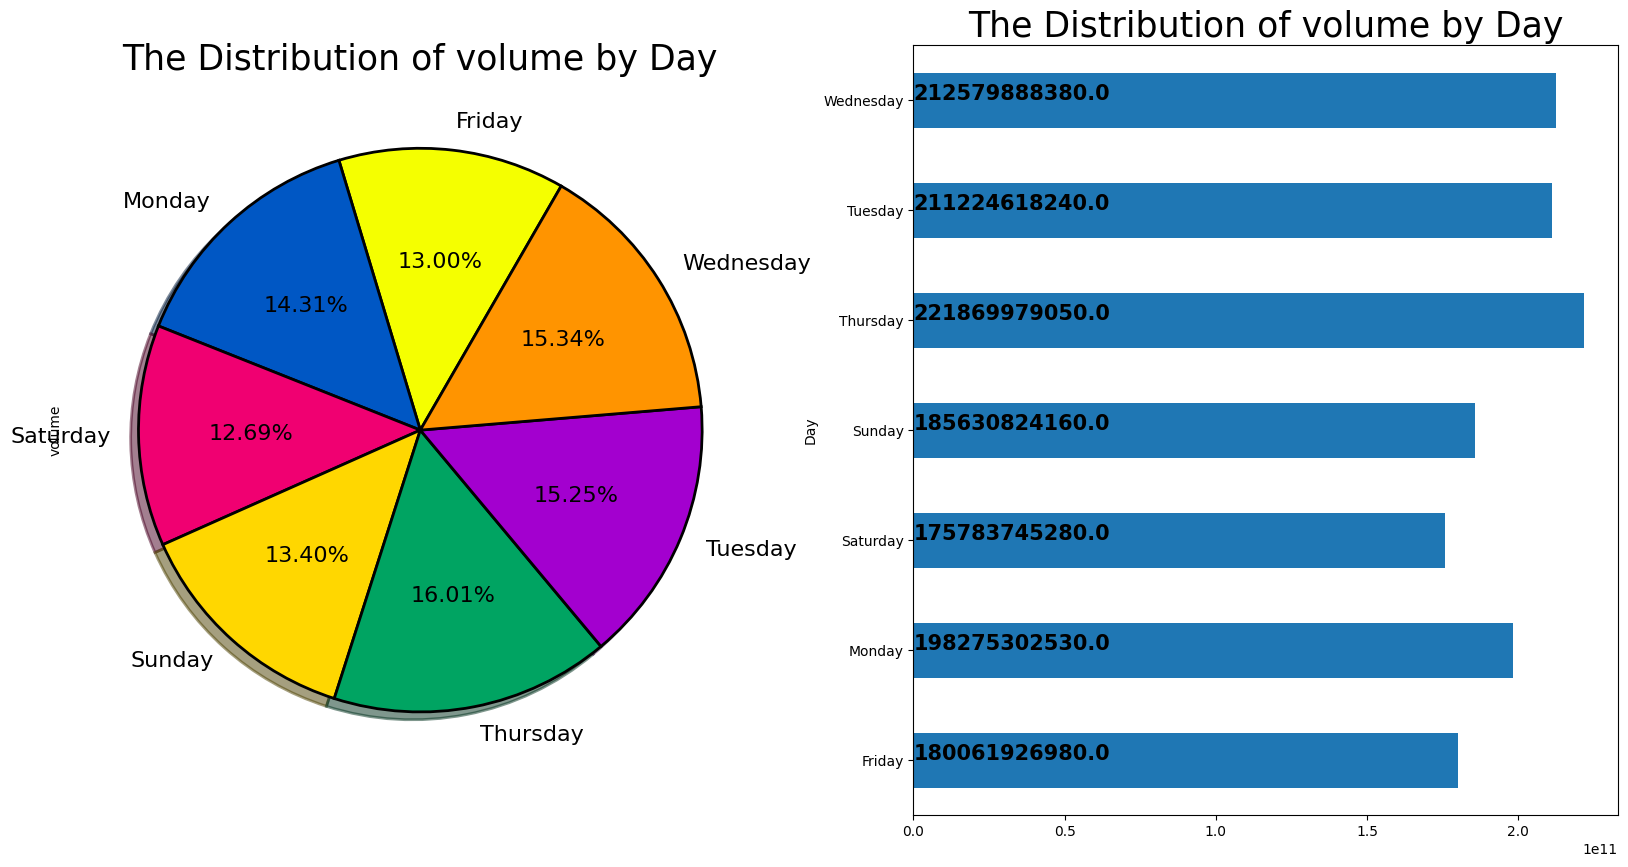

In [ ]:
plot_group(df_dummy.groupby('Day')['volume'].sum(), "The Distribution of volume by Day")

 - The information gained from this analysis can be useful for traders and investors to plan their trading strategies, as well as for market analysts to understand the weekly patterns and dynamics of trading volumes in the cryptocurrency market. It can also aid in identifying potential opportunities or trends that may arise on specific days of the week.

Percentage values:
Month
April         1.541005
August        3.873549
December     15.092552
February     43.936793
July          5.221143
June          3.877983
March         5.620593
May           1.345099
November      6.398088
October       6.090935
September     7.002260
Name: volume, dtype: float64
Count values:
Month
April        1.492839e+10
August       3.752476e+10
December     1.462081e+11
February     4.256349e+11
July         5.057950e+10
June         3.756771e+10
March        5.444913e+10
May          1.303057e+10
November     6.198108e+10
October      5.900555e+10
September    6.783395e+10
Name: volume, dtype: float64


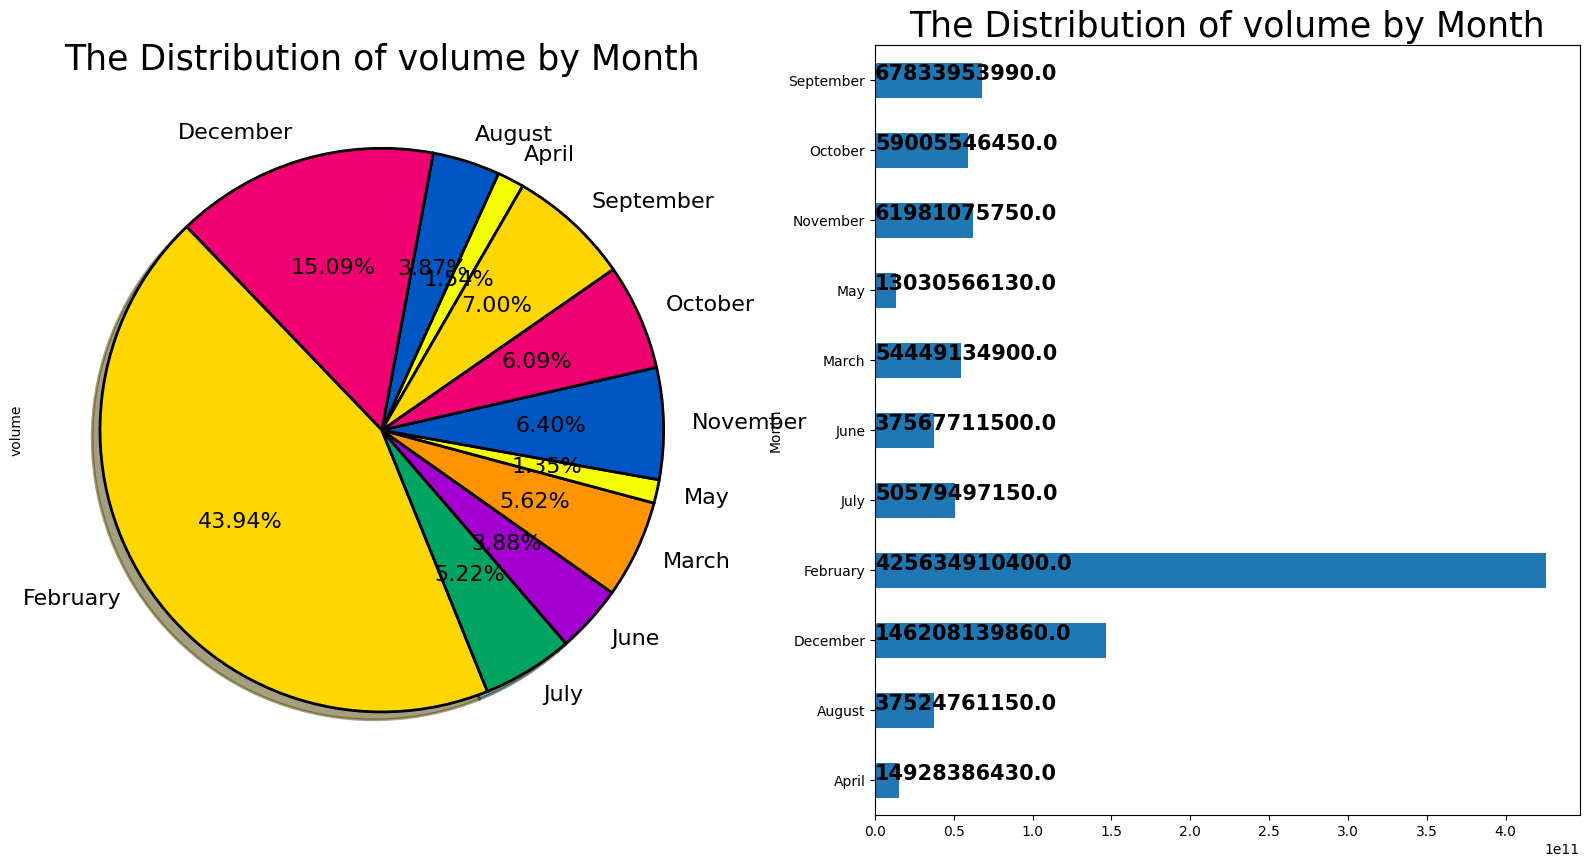

In [ ]:
# Now doing same for Month and Quarter
plot_group(df_dummy.groupby('Month')['volume'].sum(), "The Distribution of volume by Month")

Percentage values:
Quarter
April-June    65.085731
July-Sept     13.303160
Oct-Dec       21.611110
Name: volume, dtype: float64
Count values:
Quarter
April-June    4.950124e+11
July-Sept     1.011778e+11
Oct-Dec       1.643643e+11
Name: volume, dtype: float64


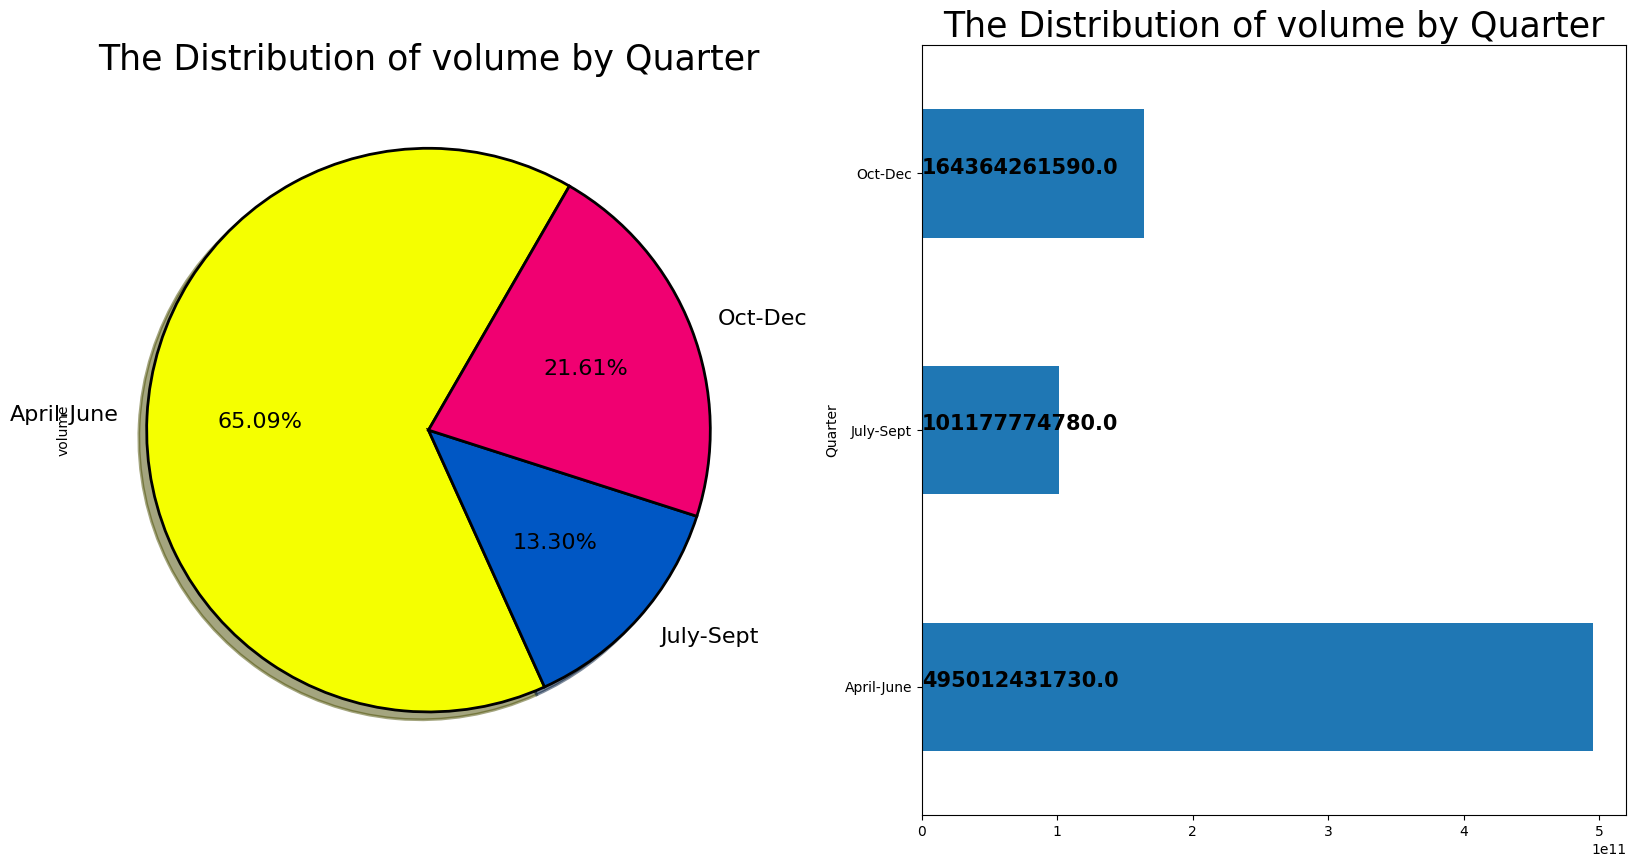

In [ ]:
plot_group(df_dummy.groupby('Quarter')['volume'].sum(), "The Distribution of volume by Quarter")

 - The information gained from this analysis can be valuable for traders, investors, and market analysts to understand the quarterly patterns and dynamics of trading volumes in the cryptocurrency market. It can also help in identifying potential trading opportunities or trends that may emerge during specific quarters of the year.